# Imports

In [300]:
import importlib
import functions as f  # Our defined functions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

importlib.reload(f)

GRatio = (1 + 5 ** (1/2)) / 2

WIDTH = .5
DASH = (10, 10)


# Solving models

Model verified.
Writing new model to file models/SIS.json.
File name already exists.


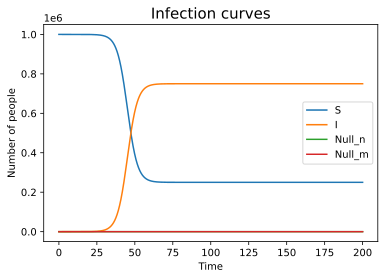

Pop variation: -0

Computation of R0 
Model verified.
Writing new model to file models/SIS.json.
File name already exists.
Creating new model!
New model created in 0.0e+00 seconds.
R0 computation done

R0: {'Rt(S,I)': 3.9600289034161706}

Computation of R0 with autoInfections
Model verified.
Writing new model to file models/SIS.json.
File name already exists.
Creating new model!
New model created in 0.0e+00 seconds.
R0 computation done

R0: {'Rt(S,I)': 3.960029703341937}


In [301]:
name = 'SIS'
model = f.loadModel(name)
solution, t_span = f.solve(model, (0, 200), 100)

fig = plt.figure()
f.plotCurves(t_span,
             np.transpose(solution),
             toPlot=list(range(solution.shape[1])),
             labels=f.getCompartments(model))
plt.show()

print(f"Pop variation: {f.getPopChange(model, solution):+.0f}")

model, modelMod, _, r0 = f.computeR0(
    name, (0, 100), 10,
    printInit=False, autoInfections=False)
# f.printModel(modelMod['flows']['contacts'])
print(f'R0: {r0}')
model, modelMod, _, r0 = f.computeR0(
    name, (0, 100), 10,
    printInit=False, autoInfections=True)
# f.printModel(modelMod['flows']['contacts'])
print(f'R0: {r0}')


Model verified.
Writing new model to file models/SIR_vars.json.
File name already exists.


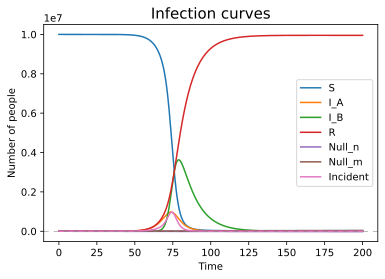

Pop variation: -15857

Computation of R0 
Model verified.
Writing new model to file models/SIR_vars.json.
File name already exists.
Creating new model!
From:  {'from': 'Null_n', 'to': 'I_B', 'rate': 'Null_n', 'contact': 'Null_m', 'parameter': 1, 'ti': 50, 'tf': 51},
  to:  {'from': 'Null_n', 'to': 'I_B^1', 'rate': 'Null_n', 'contact': 'Null_m', 'parameter': 1, 'ti': 51.0, 'tf': 51, 'split': False},
Added: {'from': 'Null_n', 'to': 'I_B^0', 'rate': 'Null_n', 'contact': 'Null_m', 'parameter': 1, 'ti': 50, 'tf': 51.0, 'split': 'New'}
 and:  {'from': 'Null_n', 'to': 'I_B^1', 'rate': 'Null_n', 'contact': 'Null_m', 'parameter': 1, 'ti': 50, 'tf': 51.0, 'split': 'Original'}.
New model created in 0.0e+00 seconds.
init: {'S': 9999999.0, 'I_A': 1.0, 'I_B': 0.0, 'R': 0.0, 'Null_n': 0.0, 'Null_m': 0.0}
Initializing with values {'S': 9999999.0, 'I_A': 1.0, 'I_B': 0.0, 'R': 0.0, 'Null_n': 0.0, 'Null_m': 0.0}.
NewDelta: [0, 0.4, 0.0, 0, 0, 0]
Init done. Values for layer 0: [0, 0.4, 0.0, 0]
           

In [302]:
modelName = 'SIR_vars'

model = f.loadModel(modelName)
solution, t_span = f.solve(model, (0, 200), 100)

# SIRS_deaths2 = f.mod(SIRS_deaths)
# solution2, t_span2 = f.solve(SIRS_deaths2, (0, 200), 100)

fig = plt.figure()
f.plotCurves(t_span,
             np.transpose(solution),
             toPlot=list(range(solution.shape[1])),
             labels=f.getCompartments(model))
plt.plot(t_span, f.infCurve(model, solution, t_span), label='Incident')
plt.legend(loc='best')
plt.axhline(y=0, linestyle='--', color='grey', linewidth=WIDTH, dashes=DASH)
plt.show()

popChange = f.getPopChange(model, solution)
print(f"Pop variation: {popChange:.0f}")

model, modelMod, _, r0 = f.computeR0(modelName, (0, 100), 10)
print(f'R0: {r0}')



Computation of Rt
Model verified.
Creating new model!
New model created in 0.0e+00 seconds.
Writing new model to file models/SIS_mod.json.
Véfication faite, les deux modèles sont identiques.



Rt computation done


Computation of Rt
Model verified.
Creating new model!
New model created in 0.0e+00 seconds.
Véfication faite, les deux modèles sont identiques.



Rt computation done



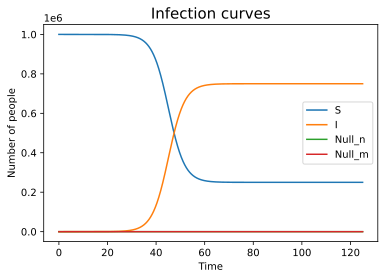

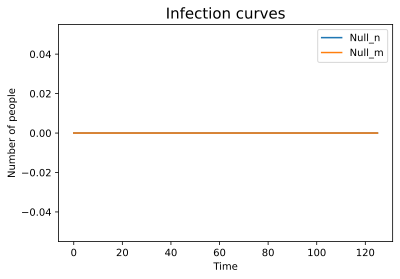

1.0 1.0
0.9999932915732022 1.0000000599073964
Time difference: 30.6
Rt value:        1.0000000599073964


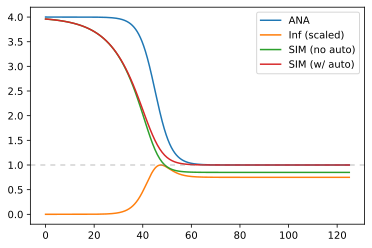

Pop variation: -0


In [190]:
model, newModel, solution, t_span, values = f.computeRt(
    'SIS', (0, 125), sub_rt=1, autoInfections=True,
    write=True, overWrite=True)

_, _, _, _, values2 = f.computeRt(
    'SIS', (0, 125), sub_rt=1, autoInfections=False)

fig = plt.figure()
f.plotCurves(t_span,
             np.transpose(solution),
             toPlot=list(range(solution.shape[1])),
             labels=f.getCompartments(model))
plt.show()

fig = plt.figure()
f.plotCurves(t_span,
             np.transpose(solution),
             toPlot=[2, 3],
             labels=f.getCompartments(model))
plt.show()

fig = plt.figure()

infsScaled = f.infCurveScaled(model, solution)
rt_times = np.array([key for key in values])
rt = np.zeros_like(rt_times, dtype='float64')
for rtNode in f.getRtNodes(f.mod(model, False, False)):
    rt_rtNode = np.array([values[key][rtNode] for key in values])
    if len(f.getRtNodes(f.mod(model, False, False))) > 1:
        plt.plot(rt_times, rt_rtNode, label=rtNode)
    rt += rt_rtNode

# This is only there for no auto infections
rt2 = np.zeros_like(rt_times, dtype='float64')
for rtNode in f.getRtNodes(f.mod(model, False, False)):
    rt_rtNode = np.array([values2[key][rtNode] for key in values])
    if len(f.getRtNodes(f.mod(model, False, False))) > 1:
        plt.plot(rt_times, rt_rtNode, label=rtNode)
    rt2 += rt_rtNode

rt_ANA = 4 * solution[:, 0] / np.array([f.popTot(model, x) for x in solution])

idx_infs = f.find_intersection(infsScaled, 1)
xTimeInfs = (t_span[idx_infs[0]] + t_span[idx_infs[1]]) / 2
idx_rt = f.find_intersection(rt, 1)
xTimeRt = (rt_times[idx_rt[0]] + rt_times[idx_rt[1]]) / 2
rtValue = (rt[idx_rt[0]] + rt[idx_rt[1]]) / 2

idx_infs = f.find_nearest(infsScaled, 1)
xTimeInfs = t_span[idx_infs]
idx_rt = f.find_nearest(rt, 1)
xTimeRt = rt_times[idx_rt]

print(f'Time difference: {np.abs(xTimeInfs - xTimeRt)}')
print(f'Rt value:        {rtValue}')

plt.plot(t_span, rt_ANA, label='ANA')
plt.plot(t_span, infsScaled, label='Inf (scaled)')
plt.plot(rt_times, rt2, label='SIM (no auto)')
plt.plot(rt_times, rt, label='SIM (w/ auto)')
plt.axhline(y=1, linestyle='--', color='grey', linewidth=WIDTH, dashes=DASH)
if f.doesIntersect(rt, 1):
    plt.axvline(x=xTimeInfs, linestyle='--', color='grey',
                linewidth=WIDTH, dashes=DASH)
    plt.axvline(x=xTimeRt, linestyle='--', color='grey',
                linewidth=WIDTH, dashes=DASH)
plt.legend(loc='best')
plt.show()

fig.savefig('plot.pdf', bbox_inches='tight')

# printFlows(SIRvars)

popChange = f.getPopChange(model, solution)
print(f"Pop variation: {popChange:.0f}")



Computation of R0
Model verified.
Creating new model!
New model created in 0.0e+00 seconds.
Writing new model to file models/SIS_mod.json.
R0 computation done

{
  "Rt(S,I)": 3.960028900451747
}
Should get 4.

Computation of Rt
Model verified.
Creating new model!
New model created in 0.0e+00 seconds.
Véfication faite, les deux modèles sont identiques.
init: {'S': 1000000.0, 'I': 1.0, 'Null_n': 0.0, 'Null_m': 0.0}
Initializing with values {'S': 1000000.0, 'I': 1.0, 'Null_n': 0.0, 'Null_m': 0.0}.
NewDelta: [0, 0.4, 0, 0]
Init done. Values for layer 0: [0, 0.4]
           Values for layer 1: [1000000.0, 0.6]
Rt computation done

{
  "0.0": {
    "Rt(S,I)": 3.960028900451747
  }
}



Creating new model!
New model created in 0.0e+00 seconds.
Initializing with values {'S': 1000000.0, 'I': 1.0, 'Null_n': 0.0, 'Null_m': 0.0}.
NewDelta: [0, 0.4, 0, 0]
Init done. Values for layer 0: [0, 0.4]
           Values for layer 1: [1000000.0, 0.6]
11130
0
11130


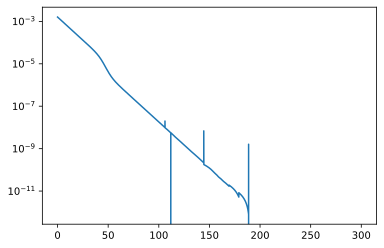

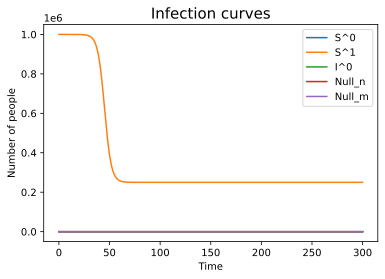

1.5840281376359515 3.9600743041602224


In [191]:
SIS, SISmod, initialConds, R0 = f.computeR0(
    "SIS", write=True, overWrite=True, whereToAdd='contact', printInit=False)
f.printModel(R0)
print(f'Should get 4.')

modelOld, newModel, solutionOld, t_spanOld, values = f.computeRt(
    'SIS', (0, 0), whereToAdd='contact', printInit=True)
f.printModel(values)

print('\n\n')
newModel = f.mod(SIS, True, True)

init = {comp: initialConds[i] for i, comp in enumerate(f.getCompartments(SIS))}
# initialize(newModel, init, modelOld, printText=printInit, whereToAdd=whereToAdd)
f.initialize(newModel, init, modelOld, True, 'contact')

solution, t_span = f.solve(newModel, (0, 300), 100)
rts = solution[:, f.getCompartments(newModel).index('Rt(S,I)')]
s_1 = solution[:, f.getCompartments(newModel).index('S^1')]
i_0 = solution[:, f.getCompartments(newModel).index('I^0')]

print(len(np.where(rts[1:] - rts[:-1] < 0)[0]))
print(len(np.where(s_1 < 0)[0]))
print(len(np.where(i_0 < 0)[0]))

plt.plot(t_span[:-1], rts[1:] - rts[:-1])
plt.yscale('log')
plt.show()

fig = plt.figure()
f.plotCurves(t_span,
             np.transpose(solution),
             toPlot=[0, 1, 2, 4, 5],
             labels=f.getCompartments(newModel))
# plt.plot(t_span, f.infCurve(newModel, solution), label='Incident')
plt.legend(loc='best')
plt.show()

print(rts[-1], rts[-1] / f.totInfs(SIS, initialConds))
